ADASYN (Adaptive Synthetic Sampling) là một phương pháp oversampling trong xử lý dữ liệu mất cân bằng, nó tạo ra các mẫu mới bằng cách nội suy giữa các mẫu của lớp thiểu số và các hàng xóm gần nhất của chúng. ADASYN tạo ra nhiều mẫu hơn từ các mẫu khó phân loại hơn.

Cách ADASYN hoạt động như sau:

Tính toán độ khó phân loại (class imbalance ratio) cho mỗi mẫu của lớp thiểu số. Độ khó phân loại được định nghĩa là tỷ lệ giữa số lượng hàng xóm gần nhất thuộc lớp đa số và số lượng hàng xóm gần nhất thuộc lớp thiểu số.
Chọn ngẫu nhiên một mẫu từ lớp thiểu số.
Tìm các hàng xóm gần nhất của mẫu được chọn dựa trên một độ đo khoảng cách, thường là K-nearest neighbors (KNN).
Tính toán trọng số cho mỗi hàng xóm gần nhất dựa trên độ khó phân loại của nó.
Tạo ra một mẫu mới bằng cách nội suy giữa mẫu được chọn và các hàng xóm gần nhất, với trọng số của từng hàng xóm được sử dụng để điều chỉnh mức độ nội suy.
Lặp lại quá trình trên để tạo ra các mẫu mới khác.
ADASYN tập trung vào việc tạo ra các mẫu mới cho những vùng dữ liệu khó phân loại hơn, giúp tăng cường dữ liệu thiểu số ở các vùng quan trọng và cải thiện khả năng phân loại cho các thuật toán máy học.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_blobs
from imblearn.over_sampling import ADASYN

## Create data

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html

We will create 2 classes, one majority one minority, clearly separated to facilitate the demonstration.

In [4]:
# Configuration options
blobs_random_seed = 42
centers = [(0, 0), (5, 5)]
cluster_std = 1.5
num_features_for_samples = 2
num_samples_total = 1600

# Generate X
X, y = make_blobs(
    n_samples=num_samples_total,
    centers=centers,
    n_features=num_features_for_samples,
    cluster_std=cluster_std)

# transform arrays to pandas formats
X = pd.DataFrame(X, columns=['VarA', 'VarB'])
y = pd.Series(y)

# create an imbalancced Xset
# (make blobs creates same number of obs per class
# we need to downsample manually)
X = pd.concat([
    X[y == 0],
    X[y == 1].sample(200, random_state=42)
], axis=0)

y = y.loc[X.index]

# display size
X.shape, y.shape

((1000, 2), (1000,))

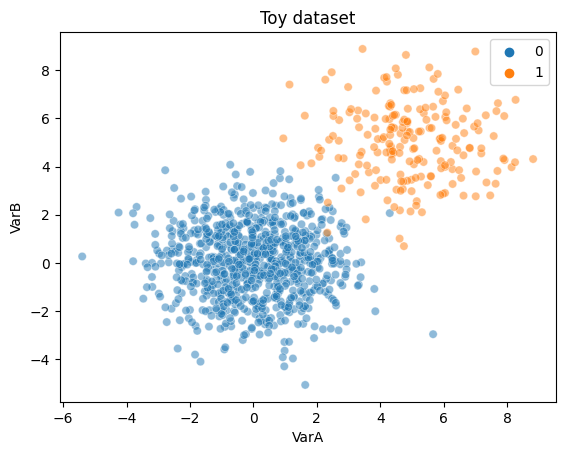

In [5]:
sns.scatterplot(
    data=X, x="VarA", y="VarB", hue=y, alpha=0.5
)

plt.title('Toy dataset')
plt.show()

## ADASYN

[ADASYN](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.ADASYN.html)

In [6]:
ada = ADASYN(
    sampling_strategy='auto',  # samples only the minority class
    random_state=0,  # for reproducibility
    n_neighbors=5,
    n_jobs=4
)

X_res, y_res = ada.fit_resample(X, y)

c:\Users\cbnn7\AppData\Local\Programs\Python\Python310\lib\site-packages\imblearn\over_sampling\_adasyn.py:156: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


In [7]:
# size of original data

X.shape, y.shape

((1000, 2), (1000,))

In [8]:
# size of undersampled data

X_res.shape, y_res.shape

((1597, 2), (1597,))

In [9]:
# number of minority class observations

y.value_counts(), y_res.value_counts()

(0    800
 1    200
 dtype: int64,
 0    800
 1    797
 dtype: int64)

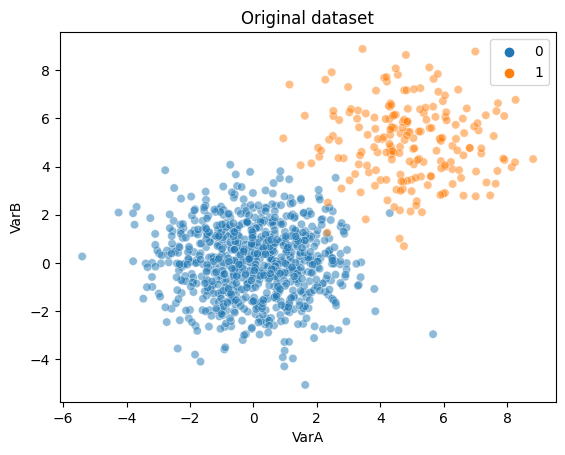

In [10]:
# plot of original data

sns.scatterplot(
    data=X, x="VarA", y="VarB", hue=y,alpha=0.5
)

plt.title('Original dataset')
plt.show()

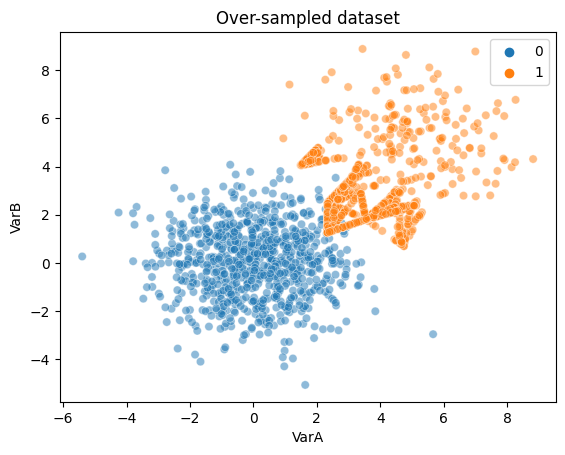

In [11]:


sns.scatterplot(
    data=X_res, x="VarA", y="VarB", hue=y_res, alpha=0.5
)

plt.title('Over-sampled dataset')
plt.show()